# 6. Regression
Looks now look at the housing dataset which has a continuous value output. There are 80 features in the model. Read more about them at the [online data dictionary][1].

[1]: https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1537163162&Signature=DJyH9SDDyhtHiKfFYNG%2F3sBpCXzB1BXkTCh9aakN3neRlcl%2BCalteIiJH9Kni%2FeGpAhdN6xQHgXinxPAJwNbG1zCymFsdG0%2FKtDBGHsthihgADyhpIkhRLhUjiwDPqstLQFe3tiAoGXc4EtBI1REpy5Az1kK4ah1X7ccxAHsluhiVloH9mteIMiYNsUkE%2BB1Gt3OnJQOYFAtRAcAyUFwf3%2BoQIrmTmF8mety89WSsi8qwdBqnGgea8eCLFba0akRrDJg9cvwtI%2F%2FFCScjQZ16l%2FjYF24ZRDtMWXW0CnXz2Q4%2Fr2Zo3rJijgr7L0b%2BlmuyordaUWEr%2BA3UrjNI3WL4g%3D%3D

In [83]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 100
%matplotlib inline

In [84]:
housing = pd.read_csv('../data/housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Identify target variable and type of problem
The target variable is sale price which is a continuous value therefore making this a regression problem. 

### Choose one predictor variable

In [85]:
housing['GrLivArea'].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [86]:
X = housing['GrLivArea'].values.reshape(-1, 1)
y = housing['SalePrice'].values

# What is the simplest regression model you can think of?
### Exercise - build a model in scikit-learn that implement's this simple model

In [87]:
# your code here

# Now for linear regression (hope you did not choose it above)
Outside of our dummy estimator, linear regression is among the simplest regression model we can choose:

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cross_val_score(lr, X, y, cv=5)

array([0.56327261, 0.52651571, 0.54831185, 0.46293328, 0.36838946])

### Objective for regression - Minimize squared distance between actual and predicted values (R-squared)

![][1]

[1]: images/r2.png

# Overfitting and Underfiting

![][1]

Credit: Andrew Ng ML class

[1]: images/reg.png

# Flexible vs Inflexible models
Given an infinite amount of flexibility, a model can be built to perfectly fit every possible point in the training dataset.

### More on flexibility
Flexibility can be achieved in two main ways:
* Using more parameters in the model
* Using a more flexible model

# Example
Let's see an example with some fake data

In [89]:
def ground_truth(x):
    return 4 - 5 * x + 2 * x ** 2 

n = 100
x = np.linspace(-10, 10, n)
y_truth = ground_truth(x)

n_data = 6

x_data = np.linspace(-10, 10, n_data)
noise = np.random.randn(n_data) * 20
y_data = ground_truth(x_data) + noise

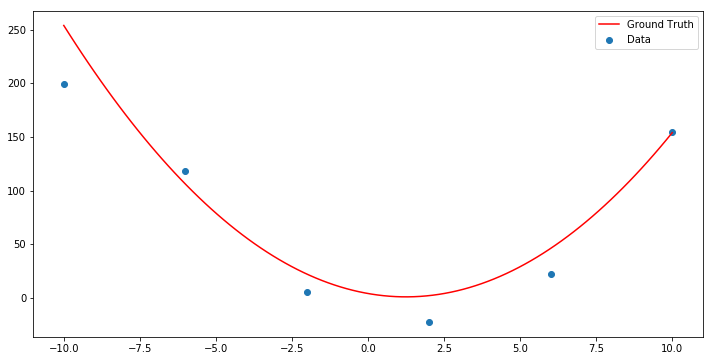

In [90]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x_data, y_data, label='Data')
ax.plot(x, y_truth, label='Ground Truth', color='red')
ax.legend();

## Make wrong assumption about nature of relationship - too simple
We will first make all of our input data 1 by raising it to the 0th power. This will have the effect of creating a dummy model.

In [91]:
lr = LinearRegression()

In [92]:
x_data_2d = x_data.reshape(-1, 1)
X = x_data_2d ** 0
X

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [93]:
X.shape

(6, 1)

In [94]:
y_data.shape

(6,)

### Train model on this data

In [95]:
lr.fit(X, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

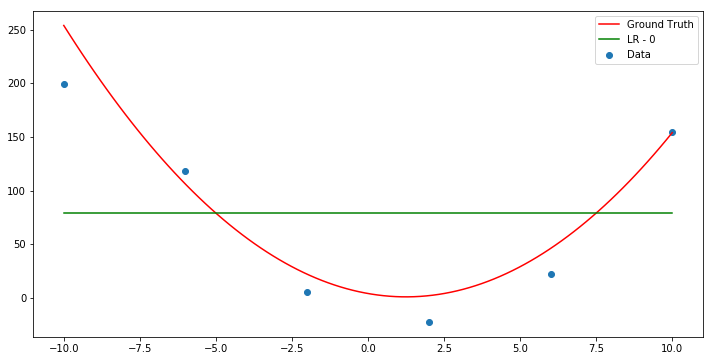

In [96]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x_data, y_data, label='Data')
ax.plot(x, y_truth, label='Ground Truth', color='red')

y_pred = lr.predict(X)
ax.plot(x_data, y_pred, label='LR - 0', color='green')
ax.legend();

## How well does guessing the mean do?

#### By definition, R-squared is 0

In [97]:
lr.score(X, y_data)

0.0

### How well do we do with our original x data?
Very bad, even worse than guessing the original data's mean.

In [98]:
X_orig_2d = x.reshape(-1, 1)

In [99]:
lr.score(X_orig_2d, y_truth)

-0.012213062637430161

# Give model more flexibility - Create Polynomial features

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
pf = PolynomialFeatures(degree=1, include_bias=False)
X_1 = pf.fit_transform(x_data_2d)
X_1

array([[-10.],
       [ -6.],
       [ -2.],
       [  2.],
       [  6.],
       [ 10.]])

### Predict and plot again

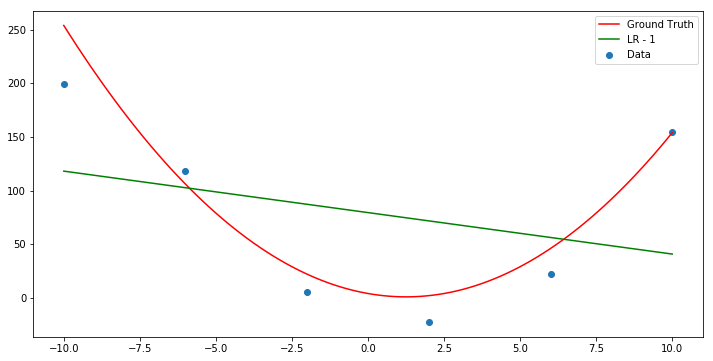

In [102]:
lr.fit(X_1, y_data)
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x_data, y_data, label='Data')
ax.plot(x, y_truth, label='Ground Truth', color='red')

y_pred = lr.predict(X_1)
ax.plot(x_data, y_pred, label='LR - 1', color='green')
ax.legend();

In [103]:
lr.score(X_1, y_data)

0.10302074983518983

## Must transform original to new feature space

In [104]:
X_orig_1 = pf.transform(X_orig_2d)
X_orig_1[:5]

array([[-10.        ],
       [ -9.7979798 ],
       [ -9.5959596 ],
       [ -9.39393939],
       [ -9.19191919]])

## Our R-squared is just about 0
This model performs terribly on the original ground truth.

In [105]:
lr.score(X_orig_1, y_truth)

0.1650582445800035

# Increase polynomial to 2
Since the ground truth is a polynomial of 2, this should give us a great fit

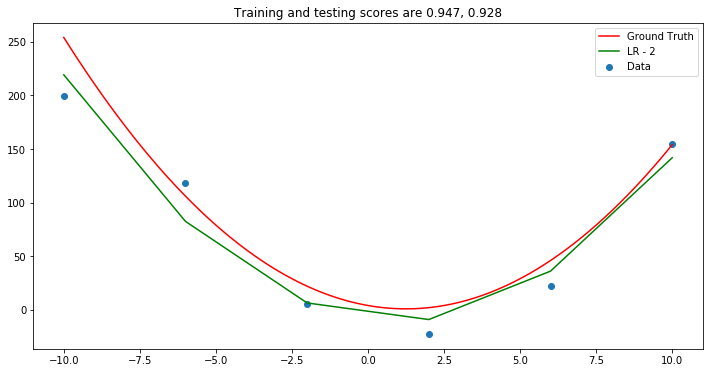

In [106]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_2 = pf.fit_transform(x_data_2d)
X_2

lr.fit(X_2, y_data)
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x_data, y_data, label='Data')
ax.plot(x, y_truth, label='Ground Truth', color='red')

y_pred = lr.predict(X_2)
ax.plot(x_data, y_pred, label='LR - 2', color='green')

train_score = lr.score(X_2, y_data)
X_orig_2 = pf.transform(X_orig_2d)
test_score = lr.score(X_orig_2, y_truth)

train_score = round(train_score, 3)
test_score = round(test_score, 3)

ax.set_title(f'Training and testing scores are {train_score}, {test_score}')
ax.legend();

## Check coefficients
The coefficients should be very close to our original model of 4, -5, and 2.

In [107]:
lr.intercept_

-8.926067502524887

In [108]:
lr.coef_

array([-3.86727454,  1.89415286])

The main driving coefficient is the squared term and our model gets very close to the ground truth.

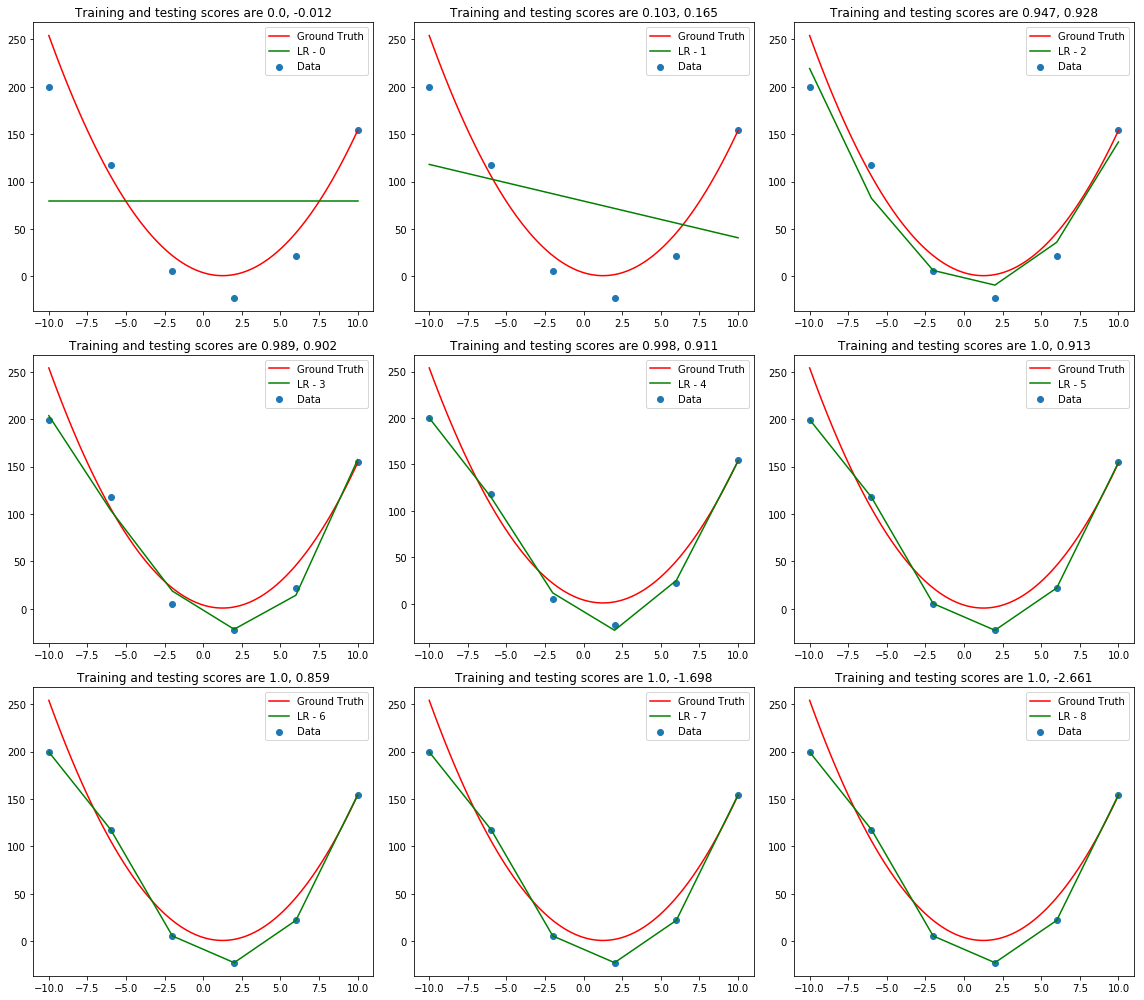

In [109]:
fig, ax_array = plt.subplots(3, 3, figsize=(16,14))
ax_flat = ax_array.flatten()

train_scores = []
test_scores = []
for i, ax in enumerate(ax_flat):
    include_bias = False
    if i == 0:
        include_bias = True
    
    pf = PolynomialFeatures(degree=i, include_bias=include_bias)
    X = pf.fit_transform(x_data_2d)

    lr.fit(X, y_data)

    ax.scatter(x_data, y_data, label='Data')
    ax.plot(x, y_truth, label='Ground Truth', color='red')

    y_pred = lr.predict(X)
    ax.plot(x_data, y_pred, label=f'LR - {i}', color='green')

    train_score = lr.score(X, y_data)
    X_orig = pf.transform(X_orig_2d)
    test_score = lr.score(X_orig, y_truth)

    train_score = round(train_score, 3)
    test_score = round(test_score, 3)

    ax.set_title(f'Training and testing scores are {train_score}, {test_score}')
    ax.legend()
    train_scores.append(train_score)
    test_scores.append(test_score)
    
fig.tight_layout()

In [110]:
train_scores

[0.0, 0.103, 0.947, 0.989, 0.998, 1.0, 1.0, 1.0, 1.0]

In [111]:
test_scores

[-0.012, 0.165, 0.928, 0.902, 0.911, 0.913, 0.859, -1.698, -2.661]

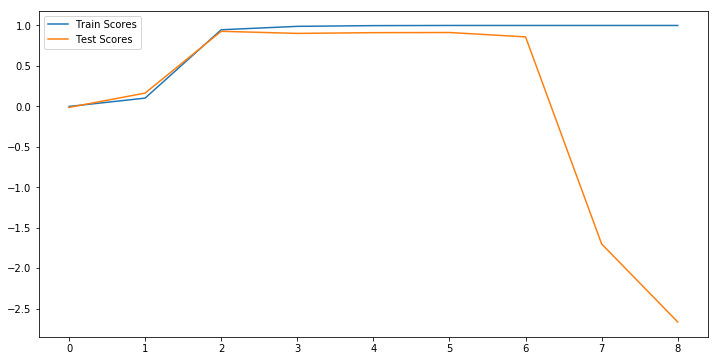

In [112]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_scores, label='Train Scores')
ax.plot(test_scores, label='Test Scores')
ax.legend();

# This is called the Bias/Variance Tradeoff

### Definitions
* **Bias** - You have lots confidence in your assumptions about the model and use a model that is not flexible enough to capture more complex relationships
* **Variance** - You put too much reliance on the data. You build a model that is very sensitive to the inputs and overfits the data. Small changes of the input data can lead to drastically different fitted values of the parameters.

High variance is often referred to as **memorization**.
![](images/bv_trade.png?1)

# Hardly ever know true relationship
You are unlikely to encounter the fictional scenario from above where the underlying process is completely known. It is still possible to build a highly flexible model like we saw with 10 degree polynomial without overfitting.

# Regularization
In machine learning, regularization is a process of constraining our model during training so that it doesn't overfit the model to the training data. We purposefully weaken the model so that it can't fit the noise. It is, of course, possible to apply too much of a dampening affect so that the signal is lost. The key is to find just the right amount regularization.

## Regularization in linear regression
Without regularization, the goal of linear regression is to get our predictions as close to the actual points as possible. However, when using regularization, we have an additional goal of keeping the values of the fitted parameters within a certain threshold.


# Ridge/Lasso Regression - A new problem formulation
* Minimize the sum of squared errors.
* For ridge, the sum of the squared values of the parameters must be less than some number (Scikit-Learn uses **`C`**)
* For lasso, we use the sum of the absolute values of the parameters.


## There is a boundary for your parameters - Find the minimum sum of squares within this boundary

![][1]


[1]: images/ridge.png?1

# Can no longer reach the minimum squared error
The center of the red contours represents the optimal values of the parameters without constraints. 

The points where the contour touches the blue-green region is the lasso/ridge solution.

# Use regularization on our 6 degree polynomial
Above, we created a 6-degree polynomial to model the 2-degree function. We subsequently overfit and had terrible results on the test data.

In [113]:
lr = LinearRegression()
pf = PolynomialFeatures(degree=7, include_bias=False)
X = pf.fit_transform(x_data_2d)
lr.fit(X, y_data)
X_orig = pf.transform(X_orig_2d)
lr.score(X_orig, y_truth)

-1.6977682586215965

## Use the Ridge and Lasso regressors in scikit-learn

In [114]:
from sklearn.linear_model import Ridge, Lasso

#### Press shift + tab + tab
Notice that we have a new parameter, alpha. This is the regularization parameter. The larger the values, the larger the constraint.

### Let's see how much improvement we get from using the default value for the regularization parameter

In [115]:
ridge = Ridge()

In [116]:
ridge.fit(X, y_data)
ridge.score(X_orig, y_truth)

-1.6313280874511085

### The model is still overfitting - Add more regularization

In [117]:
ridge = Ridge(10)
ridge.fit(X, y_data)
ridge.score(X_orig, y_truth)

-1.120199706187302

## Still not enough

In [118]:
ridge = Ridge(10**7)
ridge.fit(X, y_data)
ridge.score(X_orig, y_truth)

0.5451698067576115

## Regularization does not work when the features are of different scales

# Scale features so they are all in the same range
Standardization is the process of transforming a feature such that it has mean 0 and standard deviation of 1. Scikit-Learn provides the **`StandardScaler`** estimator.

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
ss = StandardScaler()

In [121]:
X_scaled = ss.fit_transform(X)
X_orig_scaled = ss.transform(X_orig)
X_scaled[:5]

array([[-1.46385011e+00,  1.33630621e+00, -1.69295481e+00,
         1.40436562e+00, -1.72683782e+00,  1.41300813e+00,
        -1.73137255e+00],
       [-8.78310066e-01, -2.67261242e-01, -3.65678239e-01,
        -5.57898669e-01, -1.34278909e-01, -6.55946891e-01,
        -4.84673507e-02],
       [-2.92770022e-01, -1.06904497e+00, -1.35436385e-02,
        -8.46466947e-01, -5.52588104e-04, -7.57061234e-01,
        -2.21615687e-05],
       [ 2.92770022e-01, -1.06904497e+00,  1.35436385e-02,
        -8.46466947e-01,  5.52588104e-04, -7.57061234e-01,
         2.21615687e-05],
       [ 8.78310066e-01, -2.67261242e-01,  3.65678239e-01,
        -5.57898669e-01,  1.34278909e-01, -6.55946891e-01,
         4.84673507e-02]])

### Try again with the default

In [122]:
ridge = Ridge()
ridge.fit(X_scaled, y_data)
ridge.score(X_orig_scaled, y_truth)

0.872354491261585

# Exercise
Find the optimal value for the regularizer.

In [123]:
# your code here

#  Exericse
On the housing dataset, select a high number of numerical features and fit the data with a normal linear regression. Then, use ridge and lasso to see if your model improves. Remember to scale your features when doing ridge or lasso.

In [124]:
housing.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [125]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
cols = ['OverallQual', 'LotArea', 'BsmtFinSF1']
housing[cols].head()

,OverallQual,LotArea,BsmtFinSF1
0,7,8450,706
1,6,9600,978
2,7,11250,486
3,7,9550,216
4,8,14260,655


In [129]:
from sklearn.linear_model import LinearRegression
X = housing[cols].values
y = housing['SalePrice'].values

In [131]:
from sklearn.model_selection import KFold, cross_val_score
lr = LinearRegression()
kf = KFold(n_splits=10, shuffle=True)

In [133]:
scores = cross_val_score(lr, X, y, cv=kf)
scores.mean()

0.6575448407059069

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
gbr = GradientBoostingRegressor()

In [140]:
scores = cross_val_score(gbr, X, y, cv=kf)

In [141]:
scores.mean()

0.7450597605180876